# 準備資料
- 安裝 jieba（結巴）的兩種方法<br>
(1) pip install jieba <br>
(2) 直接下載 jieba 程式資料夾 (https://github.com/fxsjy/jieba) 並置於與此程式的同一層資料夾 <br>
- 繁體中文詞典：dict.txt.big.tw
- 中文停止詞（stop words）：stopwords_zh_tw.txt
- 中英文標點符號：punctuation_zh_tw.txt, punctuation_en.txt
- 中文新聞文本（分析資料）：ny_news_zh_tw.txt

# 讀取新聞內容

In [1]:
with open ('ny_news_zh_tw.txt', 'r') as f:
    text = f.read()

# 使用 jieba，並切換至繁體中文詞典
- 使用自行定義詞典：dict.txt.big.tw <br>
- 分詞並標註詞性：pseg.cut(text)

In [2]:
import jieba
jieba.load_userdict("dict.txt.big.tw")

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/fm/3k9k8cq55zn_bw88_6fybf300000gn/T/jieba.cache
Loading model cost 0.539 seconds.
Prefix dict has been built successfully.


In [3]:
import jieba.posseg as pseg
words = pseg.cut(text) 

In [4]:
for word, tag in words:
    print(word, tag)

大火 n
中 f
的 uj
「 x
生物 n
末日 t
」 x
： x
搶救 v
澳洲 ns
野生動物 n

 x

 x
LIVIA eng
  x
ALBECK eng
- x
RIPKA eng

 x
2020 m
年 m
1 m
月 m
8 m
日 m

 x

 x
澳洲 ns
水洞 n
— x
— x
在 p
澳洲 ns
東南部 f
的 uj
森林 n
裡 zg
， x
一個 m
車隊 n
正在 t
逃離 v
肆虐 v
的 uj
大火 n
， x
車上 s
載著 v
五花八門 i
的 uj
動物 n
： x
11 m
隻 yg
無尾熊 n
、 x
15 m
隻 yg
袋鼠 n
、 x
五隻 m
雞 n
、 x
兩隻 m
負鼠 n
、 x
兩條 m
狗 n
和 c
一隻 m
吸蜜 n
鸚鵡 n
。 x

 x
經營 vn
野生動物 n
庇護所 n
的 uj
蘇珊 ns
· x
普利斯 nr
( x
Susan eng
  x
Pulis eng
) x
  x
召集 v
朋友 n
們 k
用 p
毯子 n
和 c
籃子 n
將 zg
這些 r
動物 n
打包 v
， x
然後 c
將 zg
它們 r
安置 v
在 p
海岸 s
的 uj
安全 an
地帶 n
。 x
一位 m
朋友 n
把 p
樓下 s
卧室 n
清空 n
， x
安置 v
了 ul
5 m
隻 yg
袋鼠 n
。 x
普利斯 nr
將 zg
最小 a
的 uj
幼 n
袋鼠 n
們 k
放在 v
另 r
一個 m
客廳 n
的 uj
棉 n
布袋 n
裡 zg
。 x

 x
「 x
自從 p
發生 v
火災 n
以來 f
， x
它們 r
變得 v
不 d
一樣 r
了 ul
， x
」 x
她 r
指 v
的 uj
是 v
這些 r
動物 n
， x
「 x
它們 r
非常 d
恐慌 an
。 x
」 x

 x
野火 n
已經 d
造成 v
至少 d
24 m
人 n
喪生 v
， x
1400 m
多所 m
房屋 n
被 p
毀 v
， x
6 x
萬平方公里 m
的 uj
土地 n
遭到 v
破壞 v
， x
而且 c
對 p
澳洲 ns
著名 a
的 uj
野生 b
動植物 n
造成 v
了 ul
慘重 a
的 uj
損失 n
。 x
據估計 n
， x
可能 v
有 v


## WordCount by 詞性
建立 <br>
- 名詞列表：n_words_list <br>
- 動詞列表：v_words_list <br>
- 形容詞列表：a_words_list <br>

In [5]:
n_word_list = []
v_word_list = []
a_word_list = []

In [6]:
for word, tag in pseg.cut(text):
    if(tag[0]=='n'):
        n_word_list.append(word)
    elif(tag[0]=='v'):
        v_word_list.append(word)
    elif(tag[0]=='a'):
        a_word_list.append(word)
    else:
        continue

In [7]:
n_word_list

['大火',
 '生物',
 '澳洲',
 '野生動物',
 '澳洲',
 '水洞',
 '澳洲',
 '森林',
 '車隊',
 '大火',
 '動物',
 '無尾熊',
 '袋鼠',
 '雞',
 '負鼠',
 '狗',
 '吸蜜',
 '鸚鵡',
 '野生動物',
 '庇護所',
 '蘇珊',
 '普利斯',
 '朋友',
 '毯子',
 '籃子',
 '動物',
 '地帶',
 '朋友',
 '卧室',
 '清空',
 '袋鼠',
 '普利斯',
 '幼',
 '袋鼠',
 '客廳',
 '棉',
 '布袋',
 '火災',
 '動物',
 '野火',
 '人',
 '房屋',
 '土地',
 '澳洲',
 '動植物',
 '損失',
 '據估計',
 '動物',
 '大陸',
 '珀斯',
 '科廷',
 '大學',
 '植物學家',
 '金斯利',
 '迪克森',
 '大火',
 '動物',
 '迪克森',
 '動物',
 '飢餓',
 '生物',
 '人類',
 '生態',
 '面貌',
 '澳洲',
 '野生動物',
 '大火',
 '科學家',
 '農業',
 '企業',
 '森林',
 '原因',
 '動植物',
 '數量',
 '災難性',
 '火災',
 '季節',
 '天文數字',
 '動物',
 '損失',
 '無尾熊',
 '令人',
 '圖像',
 '全世界',
 '人們',
 '荷蘭',
 '棉紡織',
 '爪子',
 '無尾熊',
 '手套',
 '紐西蘭人',
 '縫製',
 '幼',
 '袋鼠',
 '布袋',
 '蝙蝠',
 '襁褓',
 '專家',
 '社群',
 '媒體',
 '廣泛傳播',
 '數字',
 '數字',
 '哺乳動物',
 '鳥類',
 '爬行動物',
 '種群',
 '密度',
 '數字',
 '區域',
 '動物',
 '數量',
 '過火',
 '面積',
 '人們',
 '無法',
 '動物',
 '地區',
 '記錄',
 '動物',
 '損失',
 '規模',
 '科學家',
 '數字',
 '巨',
 '數字',
 '阿德萊德',
 '弗林德斯',
 '大學',
 '研究員',
 '科裡',
 '布拉德',
 '肖',
 '新南',
 '威爾斯',
 '州',
 '無尾熊',
 '大量',


# 移除標點符號與停止詞

In [8]:
punctuation = set()
with open ('punctuation_zh_tw.txt', 'r') as f:
    for line in f.readlines():
        punctuation.add(line.strip())
with open ('punctuation_en.txt', 'r') as f:
    for line in f.readlines():
        punctuation.add(line.strip())
punctuation.add('\n')
punctuation.add(' ')

In [9]:
stopwords = set()
with open ('stopwords_zh_tw.txt', 'r') as f:
    for line in f.readlines():
        stopwords.add(line.strip())

In [10]:
n_word_list = [word for word in n_word_list if word not in punctuation and word not in stopwords]
v_word_list = [word for word in v_word_list if word not in punctuation and word not in stopwords]
a_word_list = [word for word in a_word_list if word not in punctuation and word not in stopwords]

In [11]:
n_word_list

['大火',
 '生物',
 '澳洲',
 '野生動物',
 '澳洲',
 '水洞',
 '澳洲',
 '森林',
 '車隊',
 '大火',
 '動物',
 '無尾熊',
 '袋鼠',
 '雞',
 '負鼠',
 '狗',
 '吸蜜',
 '鸚鵡',
 '野生動物',
 '庇護所',
 '蘇珊',
 '普利斯',
 '朋友',
 '毯子',
 '籃子',
 '動物',
 '地帶',
 '朋友',
 '卧室',
 '清空',
 '袋鼠',
 '普利斯',
 '幼',
 '袋鼠',
 '客廳',
 '棉',
 '布袋',
 '火災',
 '動物',
 '野火',
 '人',
 '房屋',
 '土地',
 '澳洲',
 '動植物',
 '損失',
 '據估計',
 '動物',
 '大陸',
 '珀斯',
 '科廷',
 '大學',
 '植物學家',
 '金斯利',
 '迪克森',
 '大火',
 '動物',
 '迪克森',
 '動物',
 '飢餓',
 '生物',
 '人類',
 '生態',
 '面貌',
 '澳洲',
 '野生動物',
 '大火',
 '科學家',
 '農業',
 '企業',
 '森林',
 '原因',
 '動植物',
 '數量',
 '災難性',
 '火災',
 '季節',
 '天文數字',
 '動物',
 '損失',
 '無尾熊',
 '令人',
 '圖像',
 '全世界',
 '人們',
 '荷蘭',
 '棉紡織',
 '爪子',
 '無尾熊',
 '手套',
 '紐西蘭人',
 '縫製',
 '幼',
 '袋鼠',
 '布袋',
 '蝙蝠',
 '襁褓',
 '專家',
 '社群',
 '媒體',
 '廣泛傳播',
 '數字',
 '數字',
 '哺乳動物',
 '鳥類',
 '爬行動物',
 '種群',
 '密度',
 '數字',
 '區域',
 '動物',
 '數量',
 '過火',
 '面積',
 '人們',
 '無法',
 '動物',
 '地區',
 '記錄',
 '動物',
 '損失',
 '規模',
 '科學家',
 '數字',
 '巨',
 '數字',
 '阿德萊德',
 '弗林德斯',
 '大學',
 '研究員',
 '科裡',
 '布拉德',
 '肖',
 '新南',
 '威爾斯',
 '州',
 '無尾熊',
 '大量',


In [12]:
v_word_list

['搶救',
 '逃離',
 '肆虐',
 '載著',
 '經營',
 '召集',
 '打包',
 '安置',
 '安置',
 '放在',
 '發生',
 '變得',
 '指',
 '造成',
 '喪生',
 '毀',
 '遭到',
 '破壞',
 '造成',
 '死亡',
 '破壞',
 '位於',
 '說',
 '讓',
 '接近',
 '滅絕',
 '滅絕',
 '說',
 '倖存',
 '逃脫',
 '留在',
 '死於',
 '脫水',
 '說',
 '改變',
 '受到',
 '威脅',
 '說',
 '造成',
 '砍伐',
 '導致',
 '估算',
 '燒傷',
 '心碎',
 '引起',
 '關注',
 '燒傷',
 '製作',
 '表示',
 '懷疑',
 '是從',
 '發表',
 '研究',
 '估算',
 '出來',
 '死亡',
 '給定',
 '預估',
 '乘以',
 '知道',
 '逃',
 '出來',
 '進入',
 '燒毀',
 '死亡',
 '使',
 '評估',
 '說',
 '破壞',
 '說',
 '補充',
 '說',
 '死亡',
 '估算',
 '失去',
 '死亡',
 '吞噬',
 '說',
 '喪生',
 '摧毀',
 '擔心',
 '剩下',
 '破壞',
 '拍攝',
 '顯示',
 '散落',
 '燒焦',
 '引起',
 '受到',
 '影響',
 '使',
 '謀生',
 '殺死',
 '燒傷',
 '拜',
 '說',
 '進行',
 '售賣',
 '傾銷',
 '剩餘',
 '說',
 '燒傷',
 '接受',
 '說',
 '保住',
 '知道',
 '謀生',
 '逃往',
 '保護',
 '像',
 '救援',
 '作',
 '鬥爭',
 '拯救',
 '工作',
 '強化',
 '判斷',
 '保護',
 '干預',
 '幫助',
 '養活',
 '尋找',
 '倖存',
 '協助',
 '肆虐',
 '表示',
 '救出',
 '建造',
 '還有',
 '留給',
 '脫水',
 '知道',
 '不能',
 '挽回',
 '帶來',
 '放棄',
 '戰鬥',
 '說',
 '失去',
 '餵養',
 '飼養',
 '告訴',
 '檢查',
 '死亡',
 '看看',
 '有沒有'

In [13]:
a_word_list

['安全',
 '最小',
 '恐慌',
 '著名',
 '慘重',
 '獨特',
 '罕見',
 '巨大',
 '短',
 '長足',
 '黑',
 '安全',
 '恐慌',
 '嚴重',
 '乾旱',
 '小',
 '炎熱',
 '小',
 '嚴峻',
 '充足',
 '兇猛',
 '高熱',
 '涼爽',
 '痛苦',
 '瘋狂',
 '高']

# WordCount

## 名詞

In [14]:
from collections import Counter
n_word_count = Counter(n_word_list)
n_word_count

Counter({'大火': 12,
         '生物': 3,
         '澳洲': 10,
         '野生動物': 9,
         '水洞': 3,
         '森林': 5,
         '車隊': 1,
         '動物': 17,
         '無尾熊': 8,
         '袋鼠': 11,
         '雞': 1,
         '負鼠': 1,
         '狗': 1,
         '吸蜜': 1,
         '鸚鵡': 3,
         '庇護所': 1,
         '蘇珊': 1,
         '普利斯': 8,
         '朋友': 3,
         '毯子': 1,
         '籃子': 1,
         '地帶': 1,
         '卧室': 1,
         '清空': 1,
         '幼': 2,
         '客廳': 1,
         '棉': 1,
         '布袋': 2,
         '火災': 3,
         '野火': 1,
         '人': 4,
         '房屋': 1,
         '土地': 2,
         '動植物': 3,
         '損失': 4,
         '據估計': 1,
         '大陸': 1,
         '珀斯': 1,
         '科廷': 1,
         '大學': 2,
         '植物學家': 1,
         '金斯利': 1,
         '迪克森': 2,
         '飢餓': 3,
         '人類': 1,
         '生態': 1,
         '面貌': 1,
         '科學家': 3,
         '農業': 2,
         '企業': 1,
         '原因': 1,
         '數量': 2,
         '災難性': 1,
         '季節': 2,
         '天文數字':

In [15]:
n_word_count.most_common(10)

[('動物', 17),
 ('大火', 12),
 ('袋鼠', 11),
 ('澳洲', 10),
 ('野生動物', 9),
 ('無尾熊', 8),
 ('普利斯', 8),
 ('人們', 6),
 ('房子', 6),
 ('森林', 5)]

<BarContainer object of 30 artists>

findfont: Font family ['simhei'] not found. Falling back to DejaVu Sans.
/Users/prestonyu9011/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21205 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/prestonyu9011/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/prestonyu9011/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/prestonyu9011/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 28779 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/prestonyu9011/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 34955 missing from cur

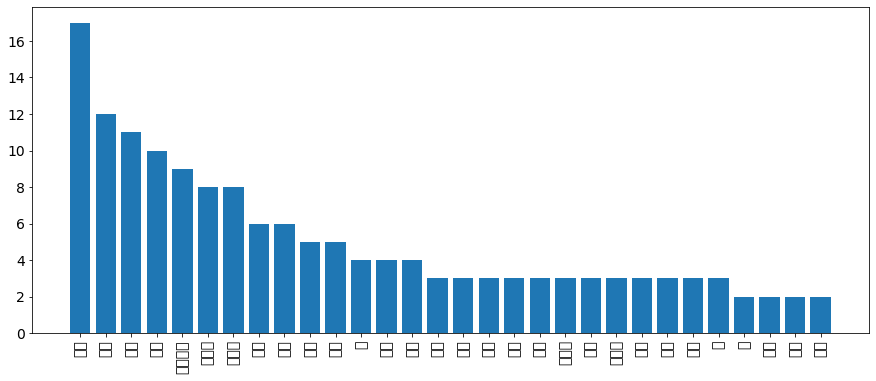

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='simhei'
plt.figure(figsize=(15,6))
plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.bar(list(dict(n_word_count.most_common()).keys())[:30], 
        list(dict(n_word_count.most_common()).values())[:30], align='center')

# 動詞

In [17]:
v_word_count = Counter(v_word_list)
v_word_count.most_common()

[('說', 16),
 ('死亡', 6),
 ('破壞', 4),
 ('燒傷', 4),
 ('造成', 3),
 ('脫水', 3),
 ('受到', 3),
 ('威脅', 3),
 ('估算', 3),
 ('出來', 3),
 ('知道', 3),
 ('燒焦', 3),
 ('保護', 3),
 ('帶來', 3),
 ('肆虐', 2),
 ('安置', 2),
 ('喪生', 2),
 ('位於', 2),
 ('滅絕', 2),
 ('倖存', 2),
 ('砍伐', 2),
 ('引起', 2),
 ('表示', 2),
 ('使', 2),
 ('失去', 2),
 ('謀生', 2),
 ('工作', 2),
 ('幫助', 2),
 ('搶救', 1),
 ('逃離', 1),
 ('載著', 1),
 ('經營', 1),
 ('召集', 1),
 ('打包', 1),
 ('放在', 1),
 ('發生', 1),
 ('變得', 1),
 ('指', 1),
 ('毀', 1),
 ('遭到', 1),
 ('讓', 1),
 ('接近', 1),
 ('逃脫', 1),
 ('留在', 1),
 ('死於', 1),
 ('改變', 1),
 ('導致', 1),
 ('心碎', 1),
 ('關注', 1),
 ('製作', 1),
 ('懷疑', 1),
 ('是從', 1),
 ('發表', 1),
 ('研究', 1),
 ('給定', 1),
 ('預估', 1),
 ('乘以', 1),
 ('逃', 1),
 ('進入', 1),
 ('燒毀', 1),
 ('評估', 1),
 ('補充', 1),
 ('吞噬', 1),
 ('摧毀', 1),
 ('擔心', 1),
 ('剩下', 1),
 ('拍攝', 1),
 ('顯示', 1),
 ('散落', 1),
 ('影響', 1),
 ('殺死', 1),
 ('拜', 1),
 ('進行', 1),
 ('售賣', 1),
 ('傾銷', 1),
 ('剩餘', 1),
 ('接受', 1),
 ('保住', 1),
 ('逃往', 1),
 ('像', 1),
 ('救援', 1),
 ('作', 1),
 ('鬥爭', 1),
 ('拯救', 1),


<BarContainer object of 30 artists>

/Users/prestonyu9011/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 35498 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/prestonyu9011/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27515 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/prestonyu9011/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/prestonyu9011/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 30772 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/prestonyu9011/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22750 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/prestonyu9011/opt/

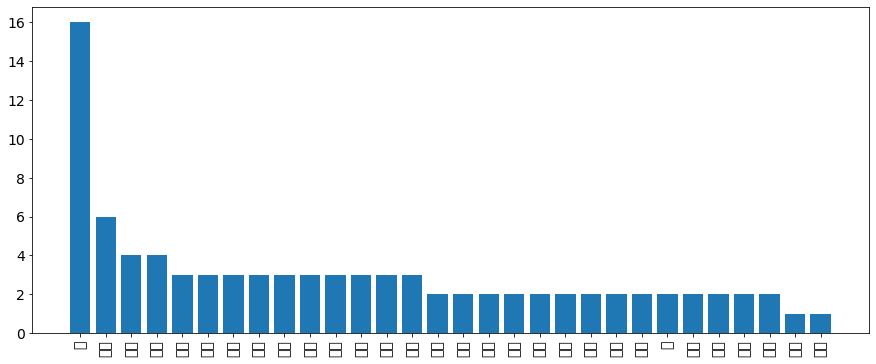

In [18]:
plt.figure(figsize=(15,6))
plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.bar(list(dict(v_word_count.most_common()).keys())[:30], 
        list(dict(v_word_count.most_common()).values())[:30], align='center')

# 形容詞

In [19]:
a_word_count = Counter(a_word_list)
a_word_count.most_common()

[('安全', 2),
 ('恐慌', 2),
 ('小', 2),
 ('最小', 1),
 ('著名', 1),
 ('慘重', 1),
 ('獨特', 1),
 ('罕見', 1),
 ('巨大', 1),
 ('短', 1),
 ('長足', 1),
 ('黑', 1),
 ('嚴重', 1),
 ('乾旱', 1),
 ('炎熱', 1),
 ('嚴峻', 1),
 ('充足', 1),
 ('兇猛', 1),
 ('高熱', 1),
 ('涼爽', 1),
 ('痛苦', 1),
 ('瘋狂', 1),
 ('高', 1)]

<BarContainer object of 23 artists>

/Users/prestonyu9011/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/prestonyu9011/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/prestonyu9011/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/prestonyu9011/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23567 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/prestonyu9011/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/prestonyu9011/opt/

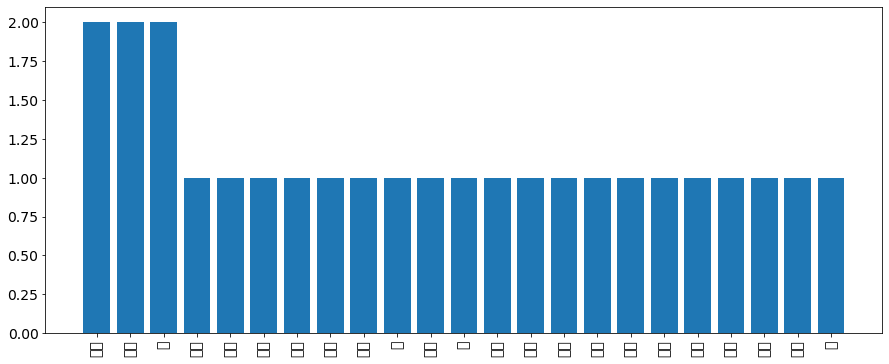

In [20]:
plt.figure(figsize=(15,6))
plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.bar(list(dict(a_word_count.most_common()).keys())[:30], 
        list(dict(a_word_count.most_common()).values())[:30], align='center')